# Problem 2

##### Pyscometric

In [21]:
import numpy as np
import scipy.optimize as optimize
import matplotlib.pyplot as plt
from scipy.stats import binom, norm

In [22]:
def psycho_neg_ll(params, data):
    P = norm.cdf(np.arange(1, 4), params[0], params[1])
    neg_ll = -np.sum(np.log(binom.pmf(data, 20, P)))
    return neg_ll

C:\Users\Usuario\AppData\Local\Temp\ipykernel_22476\2357923769.py:12: OptimizeWarning: Unknown solver options: maxfun
  result_3 = optimize.minimize(psycho_neg_ll, params0, args=(data[:, 2]), options=options)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_22476\2357923769.py:15: OptimizeWarning: Unknown solver options: maxfun
  result_23 = optimize.minimize(psycho_neg_ll, params0, args=(np.sum(data[:, 1:3], axis=1)), options=options)


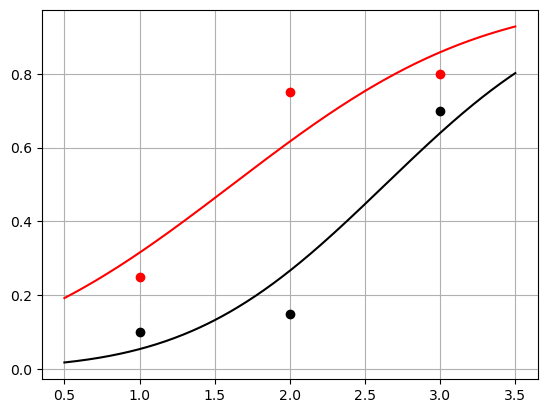

In [23]:
data = np.array([[15, 3, 2], [5, 12, 3], [4, 2, 14]])

# Opciones estándar para la función de optimización
options = {'maxfun': 1e5, 'maxiter': 1e5, 'disp': False}

N_trials = 20

# Suposición inicial para [c_I, sigma]
params0 = np.array([2, 1])

# Ajuste del modelo utilizando la función de probabilidad en el archivo psycho_neg_ll
result_3 = optimize.minimize(psycho_neg_ll, params0, args=(data[:, 2]), options=options)
params3 = result_3.x

result_23 = optimize.minimize(psycho_neg_ll, params0, args=(np.sum(data[:, 1:3], axis=1)), options=options)
params23 = result_23.x

# Gráfico
x = np.arange(0.5, 3.51, 0.01)

plt.plot(np.arange(1, 4), data[:, 2] / N_trials, 'ok', label='3')
plt.plot(x, norm.cdf(x, params3[0], params3[1]), 'k', label='Modelo 3')
plt.plot(np.arange(1, 4), np.sum(data[:, 1:3], axis=1) / N_trials, 'or', label='2-3')
plt.plot(x, norm.cdf(x, params23[0], params23[1]), 'r', label='Modelo 2-3')

plt.grid()
plt.show()


##### ROC

In [24]:
aux=data*N_trials
print(aux[0,1:3])
print(aux[1, 1:3])

[60 40]
[240  60]


In [25]:
FP3=data[0, 2]
FP2=data[0, 1:3]
TP32=data[1, 2]
TP22=data[1, 1:3]
TP33=data[2, 2]
TP23=data[2, 1:3]

In [26]:
print(FP3)
print(FP2)
print(TP32)
print(TP22)
print(TP33)
print(TP23)

2
[3 2]
3
[12  3]
14
[ 2 14]


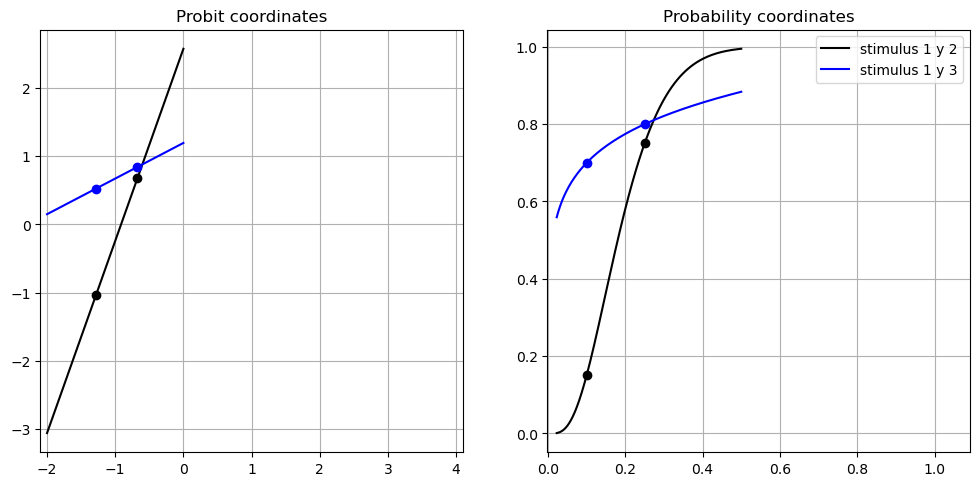

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

data = np.array([[15, 3, 2], [5, 12, 3], [4, 2, 14]])
N_trials = 20
data = data / N_trials

# False positives based on stimulus 1 flash
ZFp3 = norm.ppf(data[0, 2])  # Probit transformed false positives for response category 2
ZFp2 = norm.ppf(np.sum(data[0, 1:3]))  # Probit transformed false positives for response category 2+3

# True positives for stimulus 2 flashes
ZTp32 = norm.ppf(data[1, 2])  # Probit transformed true positives for response category 3
ZTp22 = norm.ppf(np.sum(data[1, 1:3]))  # Probit transformed true positives for response category 2+3

# True positives for stimulus 3 flashes
ZTp33 = norm.ppf(data[2, 2])  # Probit transformed true positives for response category 3
ZTp23 = norm.ppf(np.sum(data[2, 1:3]))  # Probit transformed true positives for response category 2+3

slope12 = (ZTp32 - ZTp22) / (ZFp3 - ZFp2)  # ROC slope for stimulus 1 vs 2
slope13 = (ZTp33 - ZTp23) / (ZFp3 - ZFp2)  # ROC slope for stimulus 1 vs 3

intrcpt12 = ZTp32 - slope12 * ZFp3  # ROC intercept for stimulus 1 vs 2
intrcpt13 = ZTp33 - slope13 * ZFp3  # ROC intercept for stimulus 1 vs 3

sigma12 = 1 / slope12  # sigma for stimulus 1 vs 2
sigma13 = 1 / slope13  # sigma for stimulus 1 vs 3

mu12 = intrcpt12 * sigma12  # mu for stimulus 1 vs 2
mu13 = intrcpt13 * sigma13  # mu for stimulus 1 vs 3

# Plot
x = np.arange(-2, 0.01, 0.01)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Probit coordinates')
plt.plot(x, slope12 * x + intrcpt12, 'k')  # Plot the model line for stimulus 1 vs 2
plt.plot(ZFp2, ZTp22, 'ko')  # Plot data point for response category 2+3 for stimulus 1 vs 2
plt.plot(ZFp3, ZTp32, 'ko')  # Plot data point for response category 3 for stimulus 1 vs 2
plt.plot(x, slope13 * x + intrcpt13, 'b')  # Plot the model line for stimulus 1 vs 3
plt.plot(ZFp2, ZTp23, 'bo')  # Plot data point for response category 2+3 for stimulus 1 vs 3
plt.plot(ZFp3, ZTp33, 'bo')  # Plot data point for response category 3 for stimulus 1 vs 3
plt.axis('square')
plt.grid()

plt.subplot(1, 2, 2)
plt.title('Probability coordinates')
plt.plot(norm.cdf(x), norm.cdf(slope12 * x + intrcpt12), 'k', label="stimulus 1 y 2")  # Plot the model curve for stimulus 1 vs 2
plt.plot(norm.cdf(ZFp2), norm.cdf(ZTp22), 'ko')  # Plot data point for response category 2+3 for stimulus 1 vs 2
plt.plot(norm.cdf(ZFp3), norm.cdf(ZTp32), 'ko')  # Plot data point for response category 3 for stimulus 1 vs 2
plt.plot(norm.cdf(x), norm.cdf(slope13 * x + intrcpt13), 'b', label="stimulus 1 y 3")  # Plot the model curve for stimulus 1 vs 3
plt.plot(norm.cdf(ZFp2), norm.cdf(ZTp23), 'bo')  # Plot data point for response category 2+3 for stimulus 1 vs 3
plt.plot(norm.cdf(ZFp3), norm.cdf(ZTp33), 'bo')  # Plot data point for response category 3 for stimulus 1 vs 3
plt.axis('square')
plt.grid()
plt.legend()

plt.show()


In [28]:
print(mu12)
print(mu13)
print(sigma12)
print(sigma13)

0.9138090759386875
2.285091076917951
0.3548153632772522
1.9136890354874048
